Instructions

**When taking this exam, you agree to follow the Duke Honor Code.**

- This is a closed book exam. You can use the `help()` function, and the `?` prefix or suffix but are restricted to a SINGLE browser tab.
- All necessary imports are provided. You should not need to import any other packages.
- Answer all 5 questions.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import string
import collections
import seaborn as sns
from functools import reduce
sns.set_context('notebook', font_scale=1.5)

**1**. 20 points

The four adjacent digits in the 1000-digit number that have the greatest product are 9 × 9 × 8 × 9 = 5832.

```
73167176531330624919225119674426574742355349194934
96983520312774506326239578318016984801869478851843
85861560789112949495459501737958331952853208805511
12540698747158523863050715693290963295227443043557
66896648950445244523161731856403098711121722383113
62229893423380308135336276614282806444486645238749
30358907296290491560440772390713810515859307960866
70172427121883998797908792274921901699720888093776
65727333001053367881220235421809751254540594752243
52584907711670556013604839586446706324415722155397
53697817977846174064955149290862569321978468622482
83972241375657056057490261407972968652414535100474
82166370484403199890008895243450658541227588666881
16427171479924442928230863465674813919123162824586
17866458359124566529476545682848912883142607690042
24219022671055626321111109370544217506941658960408
07198403850962455444362981230987879927244284909188
84580156166097919133875499200524063689912560717606
05886116467109405077541002256983155200055935729725
71636269561882670428252483600823257530420752963450
```

Find the thirteen adjacent digits in the 1000-digit number that have the greatest product. What is the value of this product?

(Source: Project Euler Problem 8)

In [2]:
xs = ''.join('''73167176531330624919225119674426574742355349194934
96983520312774506326239578318016984801869478851843
85861560789112949495459501737958331952853208805511
12540698747158523863050715693290963295227443043557
66896648950445244523161731856403098711121722383113
62229893423380308135336276614282806444486645238749
30358907296290491560440772390713810515859307960866
70172427121883998797908792274921901699720888093776
65727333001053367881220235421809751254540594752243
52584907711670556013604839586446706324415722155397
53697817977846174064955149290862569321978468622482
83972241375657056057490261407972968652414535100474
82166370484403199890008895243450658541227588666881
16427171479924442928230863465674813919123162824586
17866458359124566529476545682848912883142607690042
24219022671055626321111109370544217506941658960408
07198403850962455444362981230987879927244284909188
84580156166097919133875499200524063689912560717606
05886116467109405077541002256983155200055935729725
71636269561882670428252483600823257530420752963450'''.split())

In [3]:
ss = [list(xs[i:i+13]) for i in range(1000-12)]

In [4]:
ss = [list(map(int, s)) for s in ss]

In [5]:
prods = [np.prod(s) for s in ss]

In [6]:
idx = np.argmax(prods)

In [7]:
prods[idx], ss[idx]

(23514624000, [5, 5, 7, 6, 6, 8, 9, 6, 6, 4, 8, 9, 5])

**2**. 20 points

Count the unique words in s1, s2, and s3 combined after removing punctuation and converting to lower case. 

In [8]:
s1 = 'Twinkle, twinkle, little star, How I wonder what you are. Up above the world so high, Like a diamond in the sky. Twinkle, twinkle, little star, How I wonder what you are!'
s2 = 'Jack and Jill went up the hill, To fetch a pail of water. Jack fell down and broke his crown, And Jill came tumbling after.'
s3 = 'Oh, do you know the muffin man, The muffin man, the muffin man, Oh, do you know the muffin man, That lives on Drury Lane?'

In [9]:
ss = ' '.join([s1, s2, s3])

In [10]:
words =  collections.Counter(ss.translate(str.maketrans('', '', string.punctuation)).lower().split())

In [11]:
words

Counter({'twinkle': 4,
         'little': 2,
         'star': 2,
         'how': 2,
         'i': 2,
         'wonder': 2,
         'what': 2,
         'you': 4,
         'are': 2,
         'up': 2,
         'above': 1,
         'the': 7,
         'world': 1,
         'so': 1,
         'high': 1,
         'like': 1,
         'a': 2,
         'diamond': 1,
         'in': 1,
         'sky': 1,
         'jack': 2,
         'and': 3,
         'jill': 2,
         'went': 1,
         'hill': 1,
         'to': 1,
         'fetch': 1,
         'pail': 1,
         'of': 1,
         'water': 1,
         'fell': 1,
         'down': 1,
         'broke': 1,
         'his': 1,
         'crown': 1,
         'came': 1,
         'tumbling': 1,
         'after': 1,
         'oh': 2,
         'do': 2,
         'know': 2,
         'muffin': 4,
         'man': 4,
         'that': 1,
         'lives': 1,
         'on': 1,
         'drury': 1,
         'lane': 1})

**3**. 20 points

Generate a DataFrame of word counts for each "document" from problem 2. Show the top 3 rows with the largest row sums.

In [12]:
t1 = s1.translate(str.maketrans('', '', string.punctuation)).lower().split()
t2 = s2.translate(str.maketrans('', '', string.punctuation)).lower().split()
t3 = s3.translate(str.maketrans('', '', string.punctuation)).lower().split()

In [13]:
counts = np.zeros((len(words), 3), 'int')

In [14]:
for i, word in enumerate(words):
    counts[i, 0] = t1.count(word)
    counts[i, 1] = t2.count(word)
    counts[i, 2] = t3.count(word)  

In [15]:
df = pd.DataFrame(counts, index=words, columns=['s1', 's2', 's3'])
df['total'] = df.sum(axis=1)

In [16]:
df.sort_values('total', ascending=False)[:3]

,s1,s2,s3,total
the,2,1,4,7
twinkle,4,0,0,4
you,2,0,2,4


**4**. 20 points

Using the data provided, recreate this plot.

- Top row is plotted with `matplotllib` functions `plot` and `hist`
- Bottom row is plotted with `seaborn` functions `kdeplot` and `regplot`

![](plots.png)

In [17]:
n = 100
xs = np.linspace(0, 4*np.pi, n)
ys = np.sin(xs) + np.random.normal(0, 0.5, n)

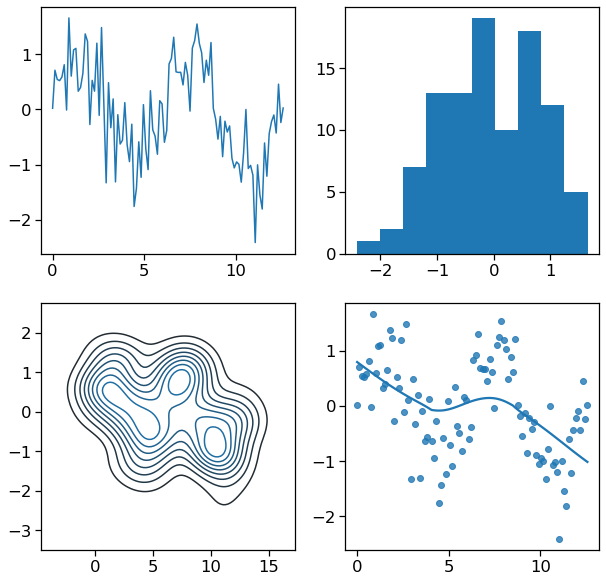

In [18]:
fig, axes = plt.subplots(2,2, figsize=(10,10))

axes[0,0].plot(xs, ys)
axes[0,1].hist(ys)
sns.kdeplot(xs, ys, ax=axes[1,0])
sns.regplot(xs, ys, lowess=True)

plt.savefig('plots.png')

**5** 20 points

Sum the nested list using only anonymous functions, and one or more of map, reduce and filter.

In [19]:
xxs = [[1,2,3], [4,5,6], [7,8,9]]

In [20]:
reduce(lambda x, y: x + y, (reduce(lambda x, y: x + y, xxs)))

45